# TRAPPIST-1 Rebound Simulations

In [1]:
import rebound
import numpy as np

In [2]:
sim = rebound.Simulation()
sim.integrator = "trace"
sim.dt = 0.0003
#sim.save_to_file('trappist_1b.bin', interval=1e4,delete_file=True) # save as binary file

In [3]:
sol_mass = (2 * np.pi)**2 

jup_gm = 1.27E17 
jup_mass = (jup_gm / (1.33E20)) * sol_mass

star_mass = 0.0898 * sol_mass

b_mass = 0.004323 * jup_mass

c_mass = 0.004115 * jup_mass

d_mass = 0.00122 * jup_mass

e_mass = 0.00218 * jup_mass

f_mass = 0.003269 * jup_mass

g_mass = 0.004156 * jup_mass

h_mass = 0.00103 * jup_mass

# add particles to the simulation (8)

sim.add(m = star_mass, hash = 'TRAPPIST-1')
sim.add(m = b_mass, a = 0.01154, inc = (90 - 89.728) * (np.pi/180), hash = 'TRAPPIST-1b')
sim.add(m = c_mass, a = 0.01580, inc = (90 - 89.778) * (np.pi/180), hash = 'TRAPPIST-1c')
sim.add(m = d_mass, a = 0.02227, inc = (90 - 89.896) * (np.pi/180), hash = 'TRAPPIST-1d')
sim.add(m = e_mass, a = 0.02925, inc = (90 - 89.793) * (np.pi/180), hash = 'TRAPPIST-1e')
sim.add(m = f_mass, a = 0.03849, inc = (90 - 89.740) * (np.pi/180), hash = 'TRAPPIST-1f')
sim.add(m = g_mass, a = 0.04683, inc = (90 - 89.742) * (np.pi/180), hash = 'TRAPPIST-1g')
sim.add(m = h_mass, a = 0.06189, inc = (90 - 89.805) * (np.pi/180), hash = 'TRAPPIST-1h')

In [4]:
# add trojans
ps = sim.particles
os = sim.orbits()


#change for each sim
a_start = ps['TRAPPIST-1b'].a
a_end = a_start * (1 + (b_mass / 3 * star_mass) ** 1/3)

sem_maj_ax = np.linspace(a_start, a_end, 20)
#print(sem_maj_ax)

#eccs = [0.1, 0.08, 0.06, 0.04, 0.02, 0.]

#ecc = eccs[0]
omega = os[0].omega + (np.pi / 3)
inc = os[0].inc
Omega = os[0].Omega
f = os[0].f

In [5]:
for i in range(20):
    a = sem_maj_ax[i]
    hash_val = 'Trojan_1b_{}'.format(i)
    
    sim.add(a = a, inc = inc, omega = omega, Omega = Omega, f = f, hash = hash_val)

sim.N_active = 8 # number of active (non-massless) particles, sun and seven planets

In [7]:
Nout = 10000 # number of points to display
tmax = 10000 # let the simulation run for 80 years
Nplanets = 7

a = np.zeros((Nplanets,Nout))
#ecc = np.zeros((Nplanets,Nout))
Omega = np.zeros((Nplanets,Nout))
omega = np.zeros((Nplanets,Nout))
inc = np.zeros((Nplanets, Nout))
f = np.zeros((Nplanets, Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim.particles

for i,time in enumerate(times):
    sim.integrate(time)
    os = sim.orbits()
    for j in range(Nplanets):
        a[j][i] = os[j].a 
        #ecc[j][i] = os[j].e
        Omega[j][i] = os[j].Omega
        omega[j][i] = os[j].omega
        inc[j][i] = os[j].inc
        f[j][i] = os[j].f
        
        # remove escaped particles
        remove_indices = [i for i, orbit in enumerate(os) if orbit.a <= 0 or orbit.a >= 1]
        for i in sorted(remove_indices, reverse=True):
            sim.remove(i+1)

## Checking a single archive

In [4]:
sa = rebound.Simulationarchive("trappist_1h.bin")

In [5]:
print("Number of snapshots: %d" % len(sa))
print("Time of first and last snapshot: %.1f, %.1f" % (sa.tmin, sa.tmax))

Number of snapshots: 185
Time of first and last snapshot: 0.0, 18400.0


In [6]:
ps = sa[1].particles
os = sa[-1].orbits()#primary=ps[0])
print(os)

[<rebound.Orbit instance, a=0.011531354059897162 e=0.0017213574697005133 inc=0.0038077385902573146 Omega=0.022599170360704805 omega=5.004468921184272 f=0.9698494959271811>, <rebound.Orbit instance, a=0.015810307276081466 e=0.0046839589504654566 inc=0.0040427963091314596 Omega=-0.09308972482088955 omega=0.31110179718911013 f=4.075964118120508>, <rebound.Orbit instance, a=0.02228120239134922 e=0.007223106955545529 inc=0.005590730214696705 Omega=0.057452455394772034 omega=1.1803913572708904 f=1.7351317642087718>, <rebound.Orbit instance, a=0.029227039301214286 e=0.004606633023149184 inc=0.004347096134154809 Omega=0.11751295325247937 omega=3.859543401905689 f=4.490848714971609>, <rebound.Orbit instance, a=0.038515749562354526 e=0.007808825500040071 inc=0.004729727939994484 Omega=0.039248561451094906 omega=0.7667762746642754 f=6.04119845973789>, <rebound.Orbit instance, a=0.04682299348040578 e=0.007997058674588104 inc=0.003298336744777202 Omega=-0.028024700502803597 omega=4.603736225628181 

## Looping through archive files

In [38]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

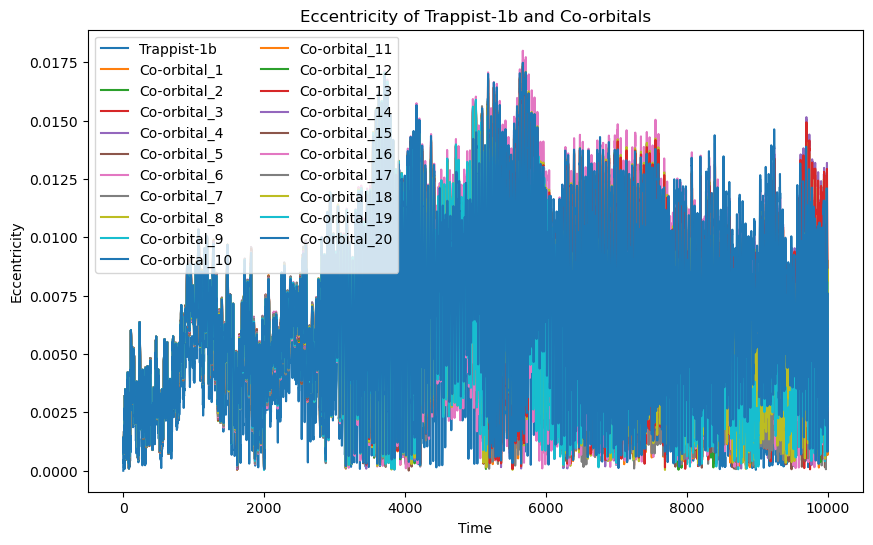

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# filenames = ["trappist_1b.bin","trappist_1c.bin","trappist_1d.bin","trappist_1e.bin","trappist_1f.bin","trappist_1g.bin","trappist_1h.bin"]
filenames = ["trappist_1b.bin"]

for filename in filenames:
    sa = rebound.Simulationarchive(filename)

    tmax = sa.tmax
    tmin = sa.tmin
    nshots = len(sa)  # number of snapshots

    times = np.linspace(tmin, tmax, nshots)

    eccentricities = []   # Store eccentricity values for Trappist-1b and its co-orbitals

    # Load in each snapshot
    for i in range(nshots):
        ps = sa[i].particles  # particles at snapshot i
        os = sa[i].orbits(primary=ps[0])  # orbits relative to the primary particle

        # List to hold eccentricity for the current snapshot
        ecc_snapshot = []

        for j in range(len(os)):
            ecc_snapshot.append(os[j].e)

        # Append the list of eccentricities for the current snapshot
        eccentricities.append(ecc_snapshot)

    # Plot eccentricity versus time for Trappist-1b and its co-orbitals
    eccentricities = np.array(eccentricities)
    plt.figure(figsize=(10, 6))
    plt.plot(times, eccentricities[:, 0], label='Trappist-1b')
    for j in range(7, 27):  # Indices 7-26 represent co-orbitals
        plt.plot(times, eccentricities[:, j], label=f'Co-orbital_{j-6}')  # Label starts from Co-orbital_1
    plt.xlabel('Time')
    plt.ylabel('Eccentricity')
    plt.title('Eccentricity of Trappist-1b and Co-orbitals')
    plt.legend(ncol=2)  # Set the number of columns in the legend
    plt.savefig('1b_eccs.png')
    plt.show()


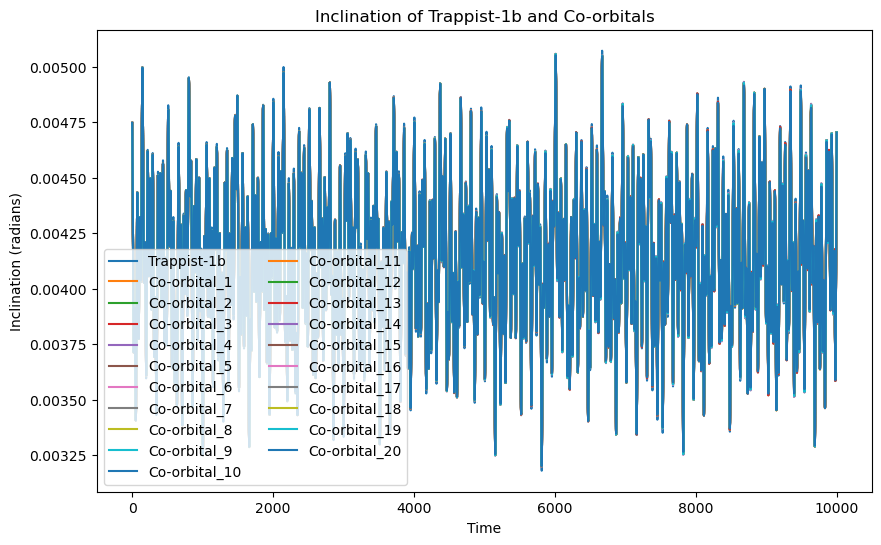

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import rebound

# filenames = ["trappist_1b.bin","trappist_1c.bin","trappist_1d.bin","trappist_1e.bin","trappist_1f.bin","trappist_1g.bin","trappist_1h.bin"]
filenames = ["trappist_1b.bin"]

for filename in filenames:
    sa = rebound.Simulationarchive(filename)

    tmax = sa.tmax
    tmin = sa.tmin
    nshots = len(sa)  # number of snapshots

    times = np.linspace(tmin, tmax, nshots)

    inclinations = []   # Store inclination values for Trappist-1b and its co-orbitals

    # Load in each snapshot
    for i in range(nshots):
        ps = sa[i].particles  # particles at snapshot i
        os = sa[i].orbits(primary=ps[0])  # orbits relative to the primary particle

        # List to hold inclination for the current snapshot
        inc_snapshot = []

        for j in range(len(os)):
            inc_snapshot.append(os[j].inc)

        # Append the list of inclinations for the current snapshot
        inclinations.append(inc_snapshot)

    # Plot inclination versus time for Trappist-1b and its co-orbitals
    inclinations = np.array(inclinations)
    plt.figure(figsize=(10, 6))
    plt.plot(times, inclinations[:, 0], label='Trappist-1b')
    for j in range(7, 27):
        plt.plot(times, inclinations[:, j], label=f'Co-orbital_{j-6}')  # chr(98)='b', chr(99)='c', ..., chr(104)='h'
    plt.xlabel('Time')
    plt.ylabel('Inclination (radians)')
    plt.title('Inclination of Trappist-1b and Co-orbitals')
    plt.legend(ncol=2)  # Set the number of columns in the legend
    plt.savefig('1b_incs.png')
    plt.show()
